# Research Question 3. Does the polarity of a film (overview) affect the popularity of the film?

### Sorting imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from textblob import TextBlob

### Reading in data

In [2]:
movie_data = pd.read_csv('Downloads/movieData_with_languages_and_genres.csv')

### Cleaning data: gettig rid of unnecessary columns, changing types and ensuring that budget and revenue are >= 0

In [3]:
movie_data = movie_data.drop(['imdb_id', 'original_title', 'poster_path', 'production_companies', 'production_countries', 'video', 'status', 'languages'], axis=1)

In [4]:
movie_data = movie_data[np.isfinite(movie_data['revenue'])]#getting rid of nan values for revenue and budget
movie_data = movie_data[np.isfinite(movie_data['runtime'])]
movie_data = movie_data[movie_data['budget'] > 0]#getting rid of 0 values for budget and revenue
movie_data = movie_data[movie_data['revenue'] > 0]
movie_data["genre"] = movie_data["genre"].astype(str)
movie_data['overview'] = movie_data['overview'].astype(str)

movie_data['release_date'] = pd.to_datetime(movie_data.release_date)

min_date = '1996-01-01 00:00:00'
valid_date = (movie_data['release_date'] > min_date)
movie_data = movie_data[valid_date]
movie_data['year_group'] = movie_data.release_date.map(lambda date: date.year//4*4)

In [5]:
def get_sentiment(text):
    
    polarity, subjectivity = TextBlob(text).sentiment
    return pd.Series({'polarity': polarity, 'subjectivity': subjectivity})

In [6]:
movie_data_with_sentiment = pd.concat([movie_data, movie_data['overview'].apply(get_sentiment)], axis=1)
movie_data_with_sentiment['year'] = movie_data_with_sentiment.release_date.dt.year

This graph gives a clear indication of the mean polarity of movies by genre. Predictably Romance is among the highest and horror is among the lowest

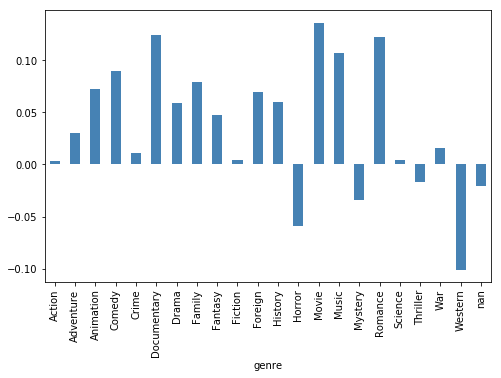

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
movie_data_with_sentiment.groupby(['genre']).polarity.mean().plot(kind='bar', color='steelblue', ax=ax)

We can see predictably fro the sentiment analysis that horror have the most negative polarity on average, and Romance is among the highest on average. This is worth discussing further

There doesn't seem to be much difference in the mean polarity of films over time

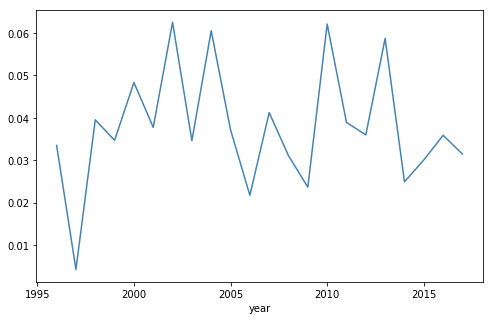

In [8]:
fi, ax = plt.subplots(figsize=(8, 5))
movie_data_with_sentiment.groupby(['year']).polarity.mean().plot(kind='line', color='steelblue', ax=ax)

The below graph doesn't show much difference in the popularity of 'happy' films as opposed to 'sad' films, which suggests that the polarity of a film is not a major contributer to it's popularity

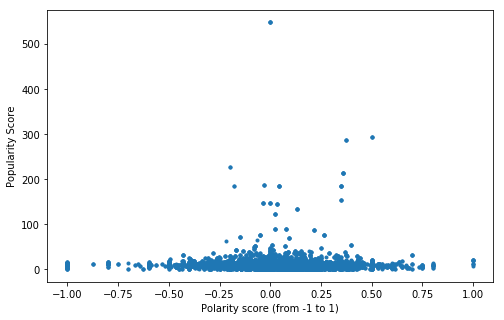

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.xlabel("Polarity score (from -1 to 1)")
plt.ylabel("Popularity Score")
plt.plot(movie_data_with_sentiment.polarity, movie_data_with_sentiment.popularity, linestyle='none', marker='.')
#movieData_with_sentiment.groupby('year_group', movieData_with_sentiment.popularity.mean()).polarity.mean().plot(kind='bar', color='steelblue', ax=ax)

In [12]:
horror_movies = movie_data_with_sentiment[movie_data_with_sentiment['genre'] == "Horror"]
#there are about 380 horror movies in the dataset
unpopular_horror_movies = horror_movies.sort_values(by='popularity').head(38)
popular_horror_movies = horror_movies.sort_values(by='popularity').tail(38)

#### For example, I want to see if the most popular horror movies have a lower polarity than the least popular horror movies (most and least popular being top and bottom 10% of horror movies in dataset). The reason for this is because if someone goes to a horror they don't want to see people having a good time, so possibly the more gory or sad or sinister the better.

## Horrors

In [13]:
print("Average polarity score for unpopular horror:")
print(unpopular_horror_movies.polarity.mean())
print()
print("Average polarity score for popular horror:")
print(popular_horror_movies.polarity.mean())
print()
print("The correlation between popularity and polarity of horror films in general")
print(np.corrcoef(horror_movies['polarity'], horror_movies['popularity'])[0, 1])

Average polarity score for unpopular horror:
-0.06535849102615698

Average polarity score for popular horror:
-0.05292275828460038

The correlation between popularity and polarity of horror films in general
0.021318281888098648


## Romance

In [14]:
#720 movies
romantic_movies = movie_data_with_sentiment[movie_data_with_sentiment['genre'] == "Romance"]
unpopular_romantic_movies = romantic_movies.sort_values(by='popularity').head(72)
popular_romantic_movies = romantic_movies.sort_values(by='popularity').tail(72)

In [15]:
print("Average polarity for popular romance:")
print(popular_romantic_movies.polarity.mean())
print()
print("Average polarity for unpopular romance:")
print(unpopular_romantic_movies.polarity.mean())
print()
print("Correlation between popularity and polarity of romantic films in general")
print(print(np.corrcoef(romantic_movies['polarity'], romantic_movies['popularity'])[0, 1]))

Average polarity for popular romance:
0.10948546428953174

Average polarity for unpopular romance:
0.09413198658031659

Correlation between popularity and polarity of romantic films in general
0.027304398727773058
None


### I originally had many more graphs, manly scatterplots in this notebook, but I decided to get rid of them as they showed no obvious correlation between the variables popularity and polarity, and I decided I was able to more accurately display my results by just printing out all the correlation coefficient values of horrors, comedies etc

## Comedy

In [16]:
#1388 movies
comedies = movie_data_with_sentiment[movie_data_with_sentiment['genre'] == "Comedy"]
unpopular_comedies = comedies.sort_values(by='popularity').head(139)
popular_comedies = comedies.sort_values(by='popularity').tail(139)
popular_comedies['net_profit_percentage'] = (popular_comedies['revenue'] - popular_comedies['budget'])/popular_comedies['budget']
#popular_comedies['log_profit_percentage'] = popular_comedies.net_profit_percentage.map(lambda net_profit_percentage: math.log(net_profit_percentage))

In [17]:
print("Average polarity for popular comedies:")
print(popular_comedies.polarity.mean())
print()
print("Average polarity for unpopular comedies:")
print(unpopular_comedies.polarity.mean())
print()
print("Corellation for comedies with popularity and polarity in general:")
print(np.corrcoef(comedies['polarity'], comedies['popularity'])[0, 1])

Average polarity for popular comedies:
0.08198507508371566

Average polarity for unpopular comedies:
0.10021332241295153

Corellation for comedies with popularity and polarity in general:
0.0010536441334673323


## Music

In [18]:
#112 movies
musicals = movie_data_with_sentiment[movie_data_with_sentiment['genre'] == "Music"]
unpopular_musicals = musicals.sort_values(by='popularity').head(11)
popular_musicals = musicals.sort_values(by='popularity').tail(11)

In [19]:
print("Average polarity for popular musicals:")
print(popular_musicals.polarity.mean())
print()
print("Average polarity for unpopular musicals:")
print(unpopular_musicals.polarity.mean())
print()
print("Corellation for musicals films with popularity and polarity in general:")
print(np.corrcoef(musicals['polarity'], musicals['popularity'])[0, 1])

Average polarity for popular musicals:
0.11207637913560778

Average polarity for unpopular musicals:
0.07638626524990161

Corellation for musicals films with popularity and polarity in general:
0.018095209504086322


## Westerns

In [20]:
#35 movies
westerns = movie_data_with_sentiment[movie_data_with_sentiment['genre'] == "Western"]
popular_westerns = westerns.sort_values(by="popularity").tail(5)
unpopular_westerns = westerns.sort_values(by="popularity").head(5)

In [21]:
print("Average polarity of most popular westerns:")
print(popular_westerns.polarity.mean())
print()
print("Average polarity of least popular westerns:")
print(unpopular_westerns.polarity.mean())
print()
print("Corellation for Westerns films with popularity and polarity in general:")
print(np.corrcoef(westerns['polarity'], westerns['popularity'])[0, 1])

Average polarity of most popular westerns:
-0.13268518518518518

Average polarity of least popular westerns:
-0.08234848484848485

Corellation for Westerns films with popularity and polarity in general:
-0.03739446279679141


In summary, though the sentiment analysis was only performed on the overview of the movies and not the plot of the movies themselves, I feel confident concluding that the polarity of a film has little to no effect on the popularity of the film, as we've seen there was little noticeable difference in the polarity of popular to unpopular horrors or comedies or any other genre that had a mean polarity score higher or lower than the majority of the other genres.